## Import Library

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

## Fire Block

In [2]:
def fire_block(x,squeeze_filters,expand_filters):
    squeezed=layers.Conv2D(filters=squeeze_filters,kernel_size=1,activation='relu')(x)
    expanded_1x1=layers.Conv2D(filters=expand_filters,kernel_size=1,activation='relu')(squeezed)
    expanded_3x3=layers.Conv2D(filters=expand_filters,kernel_size=3,padding='same',activation='relu')(squeezed)
    
    output=layers.Concatenate()([expanded_1x1,expanded_3x3])
    return output

## Model Stem

In [3]:
IMG_SHAPE=(224,224,3)
input=layers.Input(IMG_SHAPE)

In [4]:
x=layers.Conv2D(96,7,strides=2,padding='same',activation='relu')(input)
x=layers.MaxPool2D(3,strides=2,padding='same')(x)

## Main Part

In [5]:
x=fire_block(x,squeeze_filters=16,expand_filters=64)
x=fire_block(x,squeeze_filters=16,expand_filters=64)
x=fire_block(x,squeeze_filters=32,expand_filters=128)
x=layers.MaxPool2D(pool_size=3,strides=2,padding='same')(x)

x=fire_block(x,squeeze_filters=32,expand_filters=128)
x=fire_block(x,squeeze_filters=48,expand_filters=192)
x=fire_block(x,squeeze_filters=48,expand_filters=192)
x=fire_block(x,squeeze_filters=64,expand_filters=256)
x=layers.MaxPool2D(pool_size=3,strides=2,padding='same')(x)

x=fire_block(x,squeeze_filters=64,expand_filters=256)

## Last Part

In [6]:
x=layers.Conv2D(filters=1000,kernel_size=1)(x)
x=layers.GlobalAvgPool2D()(x)

In [7]:
output=layers.Activation('softmax')(x)

In [8]:
model=keras.Model(input,output)

## Analysis Model

In [9]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 112, 112, 96) 14208       input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 56, 56, 96)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 56, 56, 16)   1552        max_pooling2d[0][0]              
_______________________________________________________________________________________

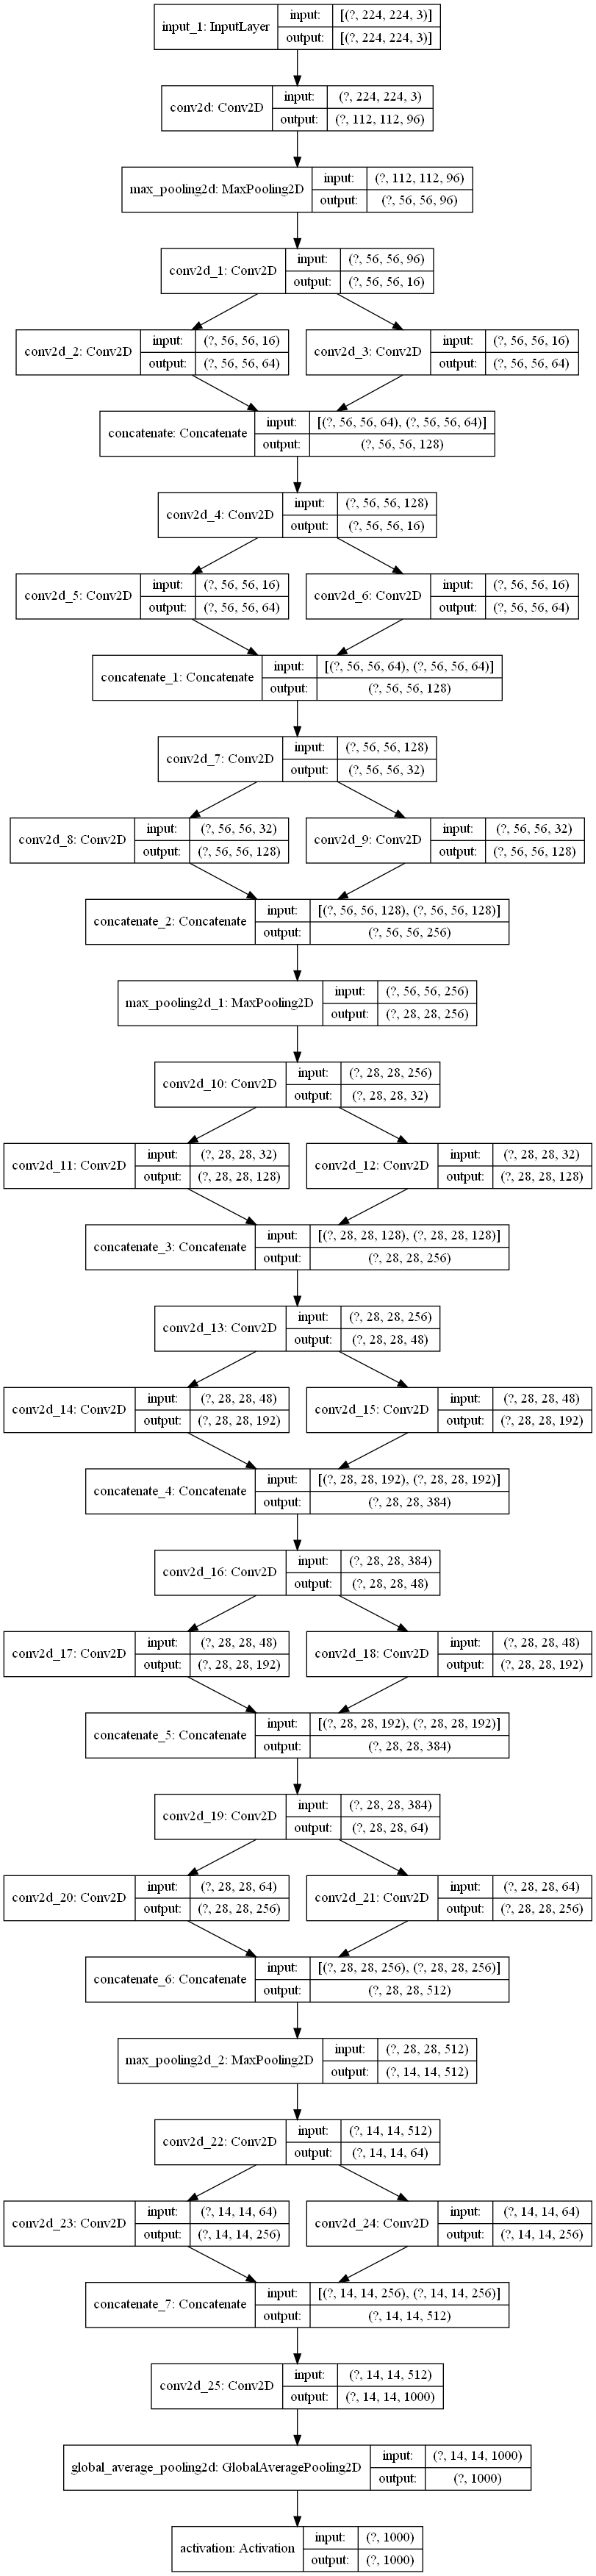

In [10]:
keras.utils.plot_model(model,'SqueezeNet.png',show_shapes=True)